<a href="https://colab.research.google.com/github/oneonethree113/Advanced-Python-Learning/blob/main/TrainSquareNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from random import *
input = [uniform(-100, 100) for i in range(100)]
output = [i**2 for i in input]

d = {'num':input, 'sq':output}

df = pd.DataFrame(data=d)
df

,num,sq
0,-53.405649,2852.163323
1,17.959840,322.555851
2,64.792261,4198.037099
3,-58.791637,3456.456553
4,-83.704126,7006.380652
...,...,...
95,-44.972061,2022.486283
96,-74.854612,5603.212989
97,16.307917,265.948167
98,94.922942,9010.364961


In [178]:
from random import *

print(uniform(1, 10))

2.012892922544807


In [179]:
df['num']

0    -53.405649
1     17.959840
2     64.792261
3    -58.791637
4    -83.704126
        ...    
95   -44.972061
96   -74.854612
97    16.307917
98    94.922942
99   -73.260100
Name: num, Length: 100, dtype: float64

In [180]:
X = df.iloc[:, 0:1]
y = df.iloc[:, 1]
data_x = torch.tensor(X.values, dtype=torch.float32)
data_y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [189]:
n_input,  n_out, batch_size, learning_rate = 1,  1, 100, 0.0001
n_hidden1,n_hidden2,n_hidden3,n_hidden4=10,20,20,20
print(data_x.size())
print(data_y.size())

torch.Size([100, 1])
torch.Size([100, 1])


In [190]:

model2 = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)
model = nn.Sequential(nn.Linear(n_input, n_hidden1),
                      nn.ReLU(),
                      nn.Linear(n_hidden1, n_hidden2),
                      nn.ReLU(),
                      nn.Linear(n_hidden2, n_out))

print(model)



Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
)


In [191]:


optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_func = nn.MSELoss()
for _ in range(15000):
    optimizer.zero_grad()
    pred = model(data_x)
    loss = loss_func(pred, data_y)
    loss.backward()
    optimizer.step()


tensor([3506.5938], grad_fn=<AddBackward0>)

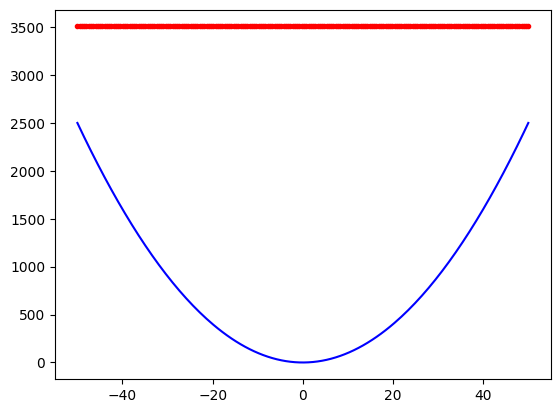

In [193]:

x = torch.linspace(-50,50, steps=200).view(-1, 1)
y = model(x)
f = x*x

plt.plot(x.detach().view(-1).numpy(), y.detach().view(-1).numpy(), 'r.', linestyle='None')
plt.plot(x.detach().view(-1).numpy(), f.detach().view(-1).numpy(), 'b')
plt.show()

In [218]:
#!/usr/bin/env python
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

X = torch.tensor([range(-100,101)]).float().view(-1, 1)
Y = X*X

model = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_func = nn.MSELoss()
losses=[]
for _ in range(150000):
    optimizer.zero_grad()
    pred = model(X)
    loss = loss_func(pred, Y)
    losses.append(loss)
    loss.backward()
    optimizer.step()


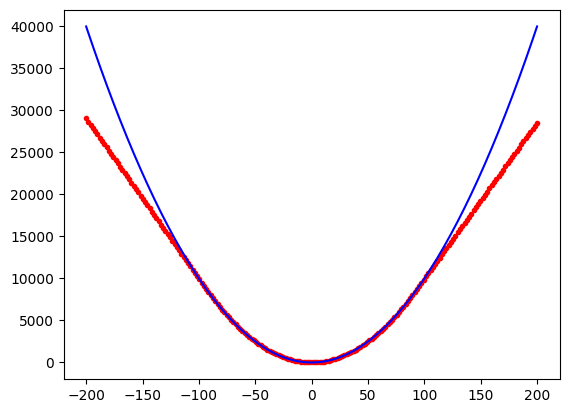

In [219]:

x = torch.linspace(-200, 200, steps=200).view(-1, 1)
y = model(x)
f = x*x

plt.plot(x.detach().view(-1).numpy(), y.detach().view(-1).numpy(), 'r.', linestyle='None',label='Predict Value')
plt.plot(x.detach().view(-1).numpy(), f.detach().view(-1).numpy(), 'b')
plt.show()

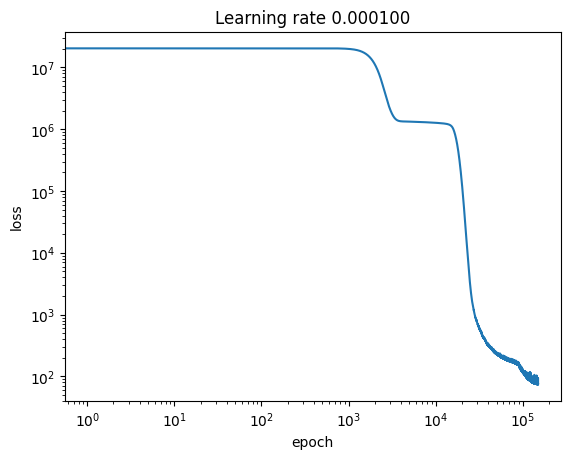

In [220]:
import matplotlib.pyplot as plt
losslist=[e.detach().numpy() for e in losses]
plt.plot(losslist)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

In [206]:
losses[0].detach().numpy()

AttributeError: ignored